**                    Problem Statement           **:
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.
It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:
1.	Number of times pregnant.
2.	Plasma glucose concentration 2 hours in an oral glucose tolerance test
3.	Diastolic blood pressure (mm Hg)
4.	Triceps skinfold thickness (mm)
5.	2-Hour serum insulin (mu U/ml)
6.	Body mass index (weight in kg/(height in m)^2)
7.	Diabetes pedigree function
8.	Age (years)
9.	Is Diabetic (0 or 1)

heart_data= pd.read_csv('heart_disease.csv')
heart_data

In [30]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing the data
data= pd.read_csv('pima-indians-diabetes.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Number of times pregnant                        768 non-null    int64  
 1   Plasma glucose concentration                    768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                768 non-null    int64  
 3   Triceps skinfold thickness (mm)                 768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                  768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)  768 non-null    float64
 6   Diabetes pedigree function                      768 non-null    float64
 7   Age                                             768 non-null    int64  
 8   Is Diabetic                                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 K

In [11]:
data.isna().sum() # Checking missing values in data

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

In [12]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


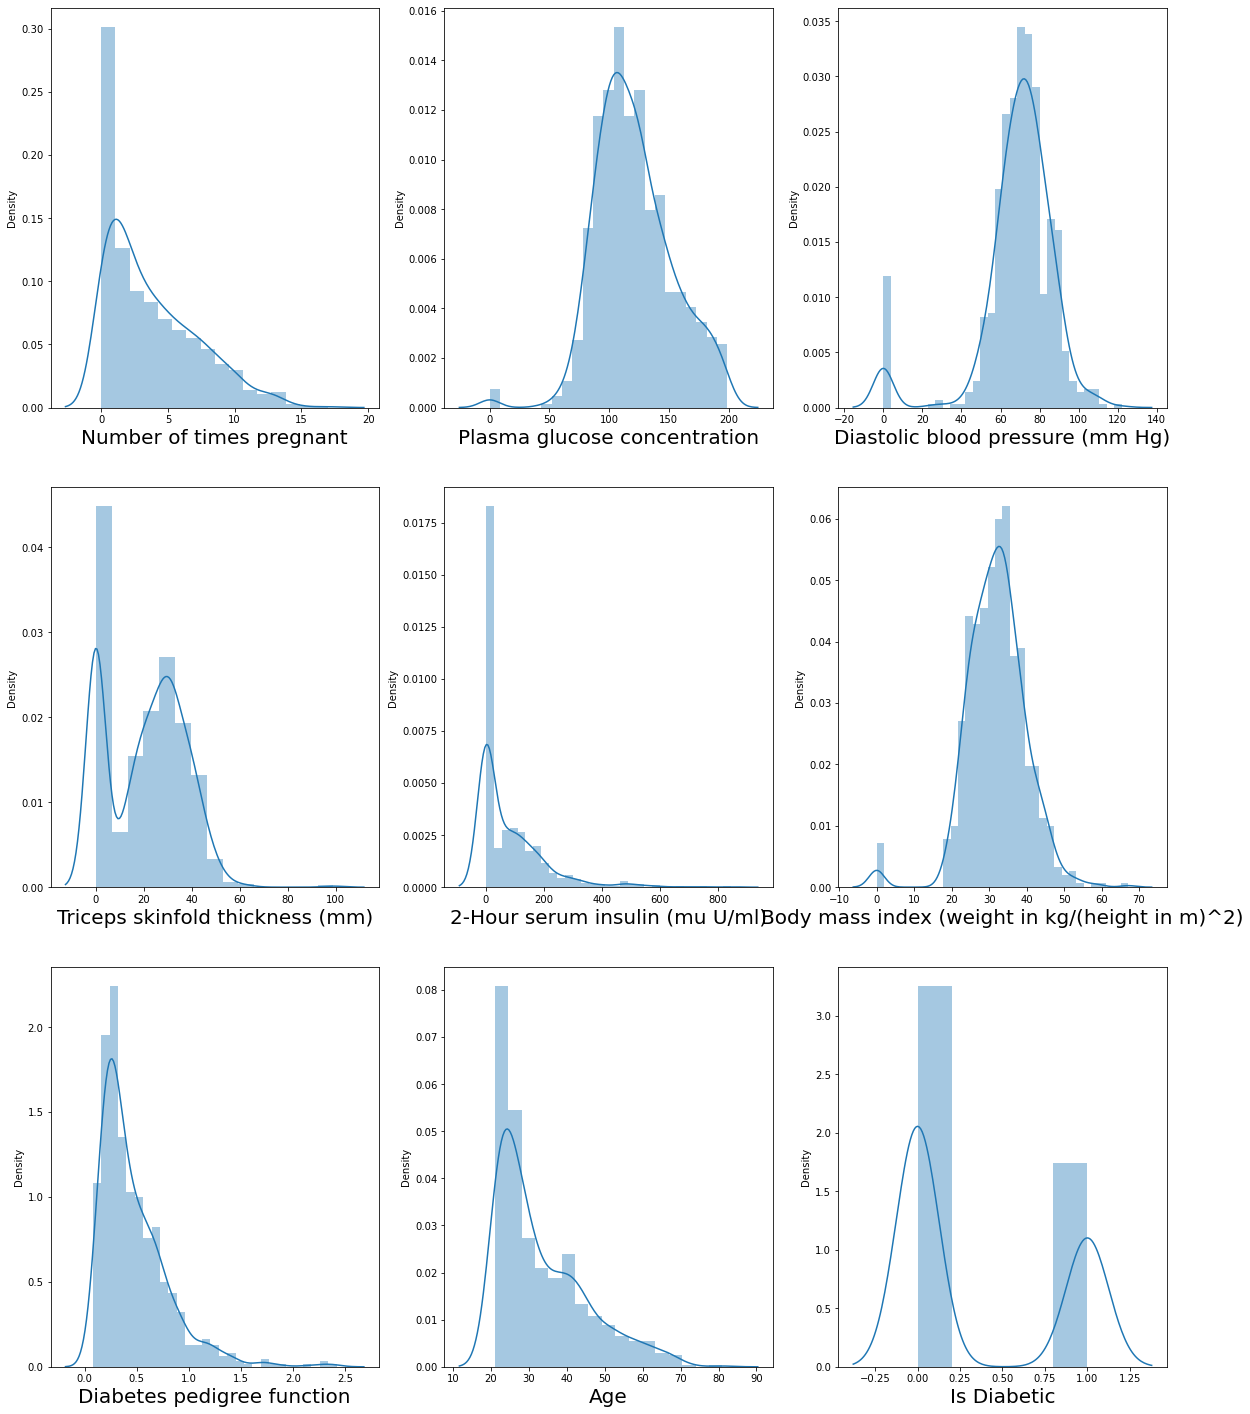

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

<AxesSubplot:>

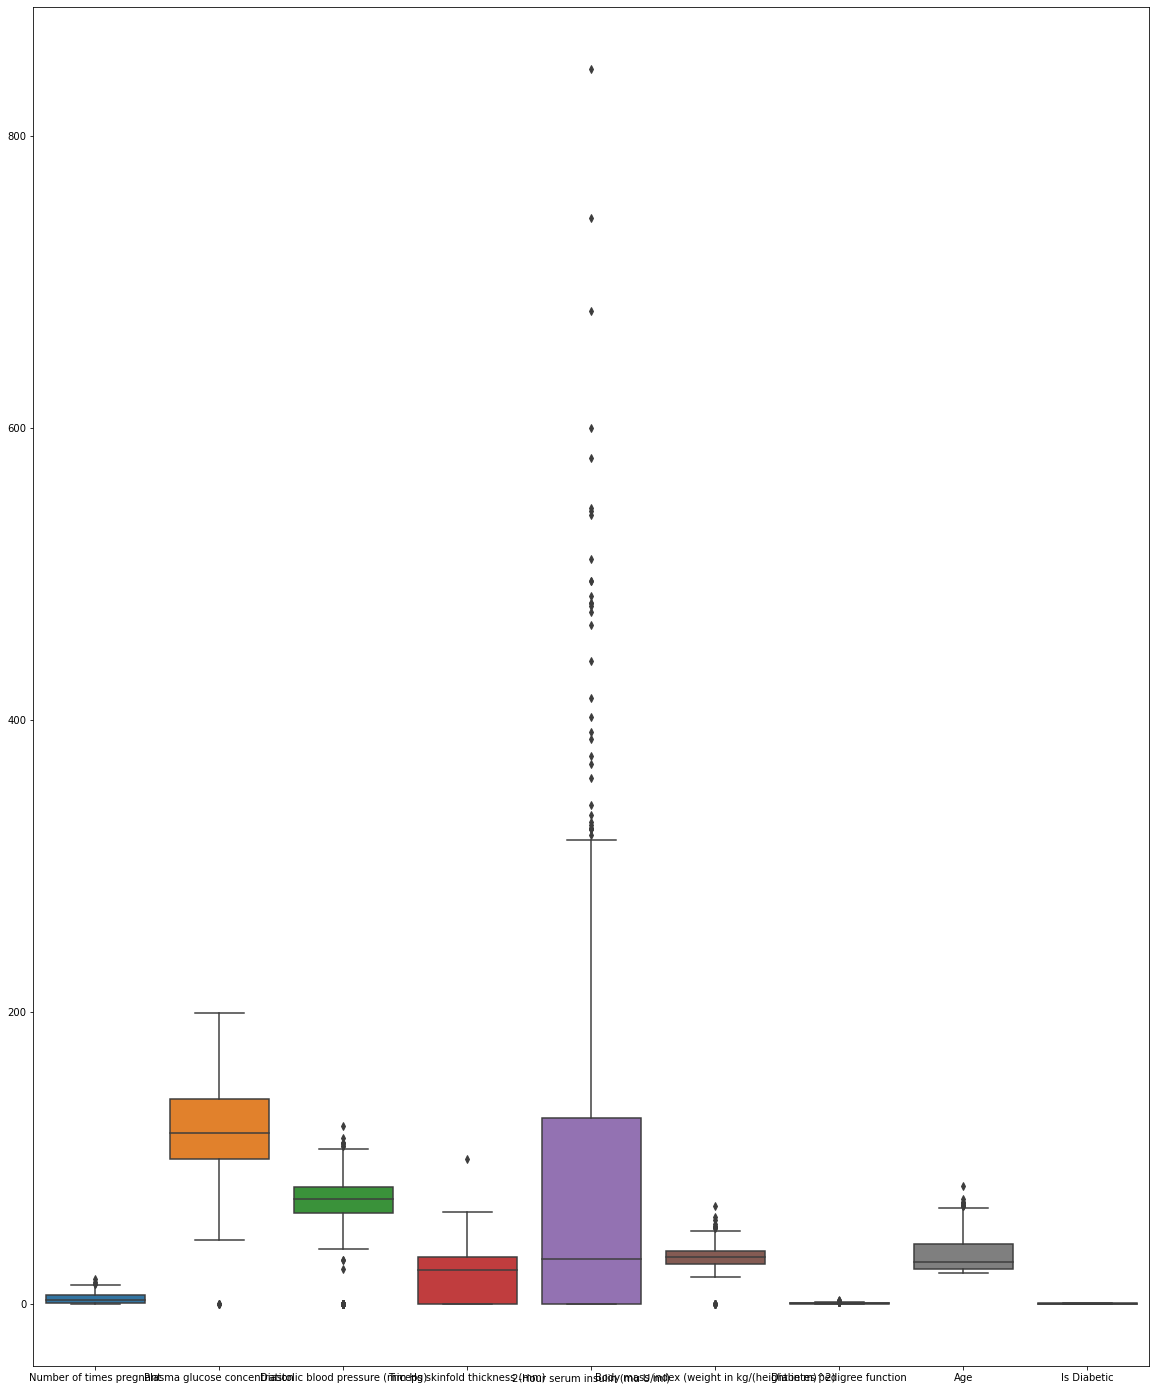

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
sns.boxplot(data=data)

In [10]:
#Separating the feature and the Label columns 
x=data.drop(labels='Is Diabetic', axis=1)
y= data['Is Diabetic']

In [13]:
# as the datapoints differ a lot in magnitude, we'll scale them

scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [14]:

train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)

In [26]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

[21:43:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

1.0

In [28]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.7359307359307359

In [29]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search

In [37]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200] 
}

In [38]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [39]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[21:48:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.759 total time=   0.0s
[21:48:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.769 total time=   0.0s
[21:48:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in

[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=50;, score=0.766 total time=   0.0s
[21:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=50;, score=0.710 total time=   0.1s
[21:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=50;, score=0.757 total time=   0.1s
[21:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/sr

[CV 3/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.776 total time=   0.1s
[21:48:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.710 total time=   0.1s
[21:48:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.682 total time=   0.1s
[21:48:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work

[CV 4/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.710 total time=   0.0s
[21:48:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=1, max_depth=20, n_estimators=50;, score=0.682 total time=   0.0s
[21:48:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=20, n_estimators=100;, score=0.806 total time=   0.1s
[21:48:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/wor

[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.748 total time=   0.1s
[21:48:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.720 total time=   0.0s
[21:48:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.729 total time=   0.0s
[21:48:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794856

[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.748 total time=   0.1s
[21:48:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.710 total time=   0.1s
[21:48:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=100;, score=0.738 total time=   0.0s
[21:48:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794856

[CV 5/5] END learning_rate=0.5, max_depth=10, n_estimators=100;, score=0.720 total time=   0.1s
[21:48:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.833 total time=   0.1s
[21:48:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=10, n_estimators=200;, score=0.778 total time=   0.1s
[21:48:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 1/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.806 total time=   0.2s
[21:48:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.787 total time=   0.2s
[21:48:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.5, max_depth=20, n_estimators=200;, score=0.757 total time=   0.2s
[21:48:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.787 total time=   0.1s
[21:48:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.750 total time=   0.1s
[21:48:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.794 total time=   0.1s
[21:48:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794856

[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.778 total time=   0.2s
[21:48:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.759 total time=   0.2s
[21:48:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.776 total time=   0.3s
[21:48:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794856

[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.750 total time=   0.1s
[21:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.776 total time=   0.1s
[21:48:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.720 total time=   0.1s
[21:48:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 3/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.776 total time=   0.1s
[21:48:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.720 total time=   0.1s
[21:48:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.1, max_depth=20, n_estimators=200;, score=0.720 total time=   0.2s
[21:48:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.692 total time=   0.1s
[21:48:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.757 total time=   0.1s
[21:48:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.824 total time=   0.0s
[21:48:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948

[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.720 total time=   0.2s
[21:48:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.701 total time=   0.3s
[21:48:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.787 total time=   0.0s
[21:48:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.701 total time=   0.4s
[21:48:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=200;, score=0.692 total time=   0.4s
[21:48:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=10;, score=0.787 total time=   0.0s
[21:48:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117

[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=200;, score=0.701 total time=   0.2s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.769 total time=   0.0s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=10;, score=0.741 total time=   0.0s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_16451179

[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.776 total time=   0.0s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.692 total time=   0.0s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=50;, score=0.673 total time=   0.0s
[21:49:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164511794

[CV 1/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.787 total time=   0.1s
[21:49:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.759 total time=   0.1s
[21:49:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.001, max_depth=10, n_estimators=100;, score=0.794 total time=   0.1s
[21:49:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164

[CV 1/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.787 total time=   0.2s
[21:49:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.759 total time=   0.1s
[21:49:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END learning_rate=0.001, max_depth=20, n_estimators=100;, score=0.794 total time=   0.1s
[21:49:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_164

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [40]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [42]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 50)
new_model.fit(train_x, train_y)

[21:49:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.7619047619047619

In [44]:
# As we have increased the accuracy of the model, we'll save this model

In [45]:
filename = 'xgboost_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [46]:
# we'll save the scaler object as well for prediction
filename_scaler = 'scaler_model.pickle'
pickle.dump(scaler, open(filename_scaler, 'wb'))

scaler_model = pickle.load(open(filename_scaler, 'rb'))

In [47]:
# Trying a random prediction
d=scaler_model.transform([[6,148,72,35,80,33.6,0.627,50]])
pred=loaded_model.predict(d)
print('This data belongs to class :',pred[0])

This data belongs to class : 1
